In [4]:
import time
from functools import wraps

def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"\nExecution time of {func.__name__}: {execution_time:.4f} seconds")
        return result
    return wrapper

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class SalesDataProcessor:
    def __init__(self, filepath):
        self.data = pd.read_csv(filepath)
    
    @timing_decorator
    def summarize_data(self):
        #Summarizing numeric data
        summary = self.data.describe(include=[np.number])
        print("Numeric Data Summary:\n")
        print(summary)
        return summary
    print("\n")
    
    @timing_decorator
    def plot_sales_over_time(self):
        """Plots total sales over time."""
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        sales_over_time = self.data.groupby('Date').sum()['Total']
        plt.figure(figsize=(10, 6))
        plt.plot(sales_over_time.index, sales_over_time.values, marker='o')
        plt.title('Total Sales Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Sales')
        plt.grid(True)
        plt.show()


In [6]:
# Example usage with the uploaded dataset
processor = SalesDataProcessor("./Data/supermarket_sales.csv")
summary = processor.summarize_data()


Numeric Data Summary:

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.

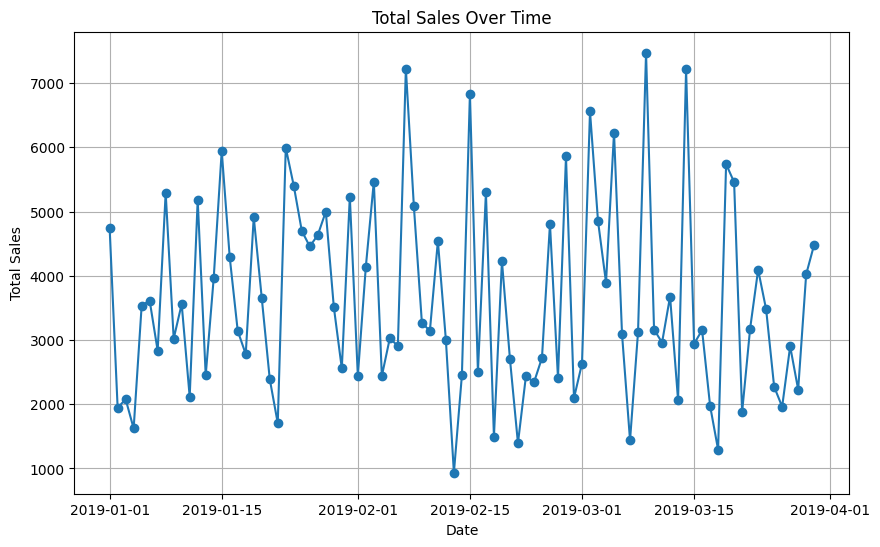


Execution time of plot_sales_over_time: 0.2031 seconds


In [7]:
#plotting
processor.plot_sales_over_time()